# 9. Herança

Trata-se de um **mecanismo** de **reutilização de código** da classe no qual **deriva-se** uma **nova classe**, denominada **subclasse**, classe derivada, ou classe filha, a partir de uma classe, denominada superclasse ou classe mãe. A **subclasse herda** todos os **métodos e campos da superclasse**, bem como pode **definir novos métodos e campos**.


## 9.1. Aplicando o mecanismo de Herança

No código a seguir a **classe B** herda o construtor e os métodos **fun**, **_fun** e **__fun** da **classe A**. 

Novos métodos são criados na **classe B** e estes métodos empregam os métodos herdados da **classe A**.

Depois todos os métodos, menos o método **privated**, são invocados fora da classe pelo objeto obj2.

In [ ]:
class A:  
   def __init__(self, x):
     self.__x = x

   def fun(self): 
        print("Public: Método A:fun, x = ",self.__x)
  
   def _fun(self): 
        print("Protected: Método A:fun, x = ",self.__x) 
    
   def __fun(self): 
        print("Privated: Método A:fun x = ",self.__x) 

In [ ]:
class B(A):  
    def __init__(self,x): 
        # Chamando construtor da superclasse 
        A.__init__(self,x)  
          
    def call_public(self):     
        # Chamando método pública da superclasse 
        print("\nPublic: Dentro da subclasse B") 
        self.fun() 
    
    def call_protected(self): 
        # Chamando método protected da superclasse 
        print("\nProtected: Dentro da subclasse B") 
        self._fun() 
          
    def call_private(self): 
        # Chamando método privado da superclasse 
        print("\nPrivated: Dentro da subclasse B") 
        self.__fun() 
  
obj2 = B(5.5) 
obj2.call_public() 
obj2.call_protected() 
#Erro: obj2.call_private() 


Public: Dentro da subclasse B
Public: Método A:fun, x =  5.5

Protected: Dentro da subclasse B
Protected: Método A:fun, x =  5.5


## 9.2 Herança: métodos de classe (**class**) x métodos estáticos (**static**)

O código a seguir ilustra três conceitos interessantes:

1. O uso de métodos da classe sem necessidade de se criar objetos através da seguinte sintaxe:

> **Nome_da_classe.metodo**

2. Métodos **static** não sabem nada acerca da classe e apenas lidam com os parâmetros fornecidos. Isto fica evidente no primeiro código no qual a classe **Filha1** irá imprimir a mesma mensagem da classe **Exemplo**, pois o parâmetro **nome** tem escopo de classe. Somente quando a classe **Filha2** redefine o método **static**, herdado da classe **Exemplo**, é que é possível imprimir o valor atualizado do campo **nome**. 

3. Métodos **class** trabalham com a classe, pois seu parâmetro é a sempre a própria classe.  No segundo código, o método **static** é declarado com método **classmethod** e não como **staticmethod**. Isto permite que seja empregada a palavra-chave **cls** como parâmetro deste método. Esse parâmetro **cls** permite extrair o campo **nome** qualquer que seja a classe. Dessa forma, o método **static** torna-se sensível aos valores da classe na qual ela está sendo empregada. A redefinição do método **static** na classe **Filha2** não é necessária, mas permaneceu para mostrar que ela irá funcionar também para **classmethod**. 

Uma observação importante é que para:

> * Declarar um método **static** usa-se **@staticmethod** antes da declaração do método;

> * Declarar um método **class** usa-se **@classmethod** antes da declaração do método.

9.2.1. Exemplo com Método estático

Neste exemplo ilustra-se o uso da palavra-chave **@staticmethod**.

In [ ]:
class Exemplo:
    nome = "Exemplo"

    @staticmethod
    def static():
        print("%s static() chamada Exemplo" % Exemplo.nome)

class Filha1(Exemplo):
    nome = "Filha1"

class Filha2(Exemplo):
    nome = "Filha2"

    @staticmethod
    def static():
        print("%s static() chamada Filha2" % Filha2.nome)

Exemplo.static() # imprime Exemplo
Filha1.static()  # imprime Exemplo
Filha2.static()  # imprime Filha2

Exemplo static() chamada Exemplo
Exemplo static() chamada Exemplo
Filha2 static() chamada Filha2


9.2.2. Exemplo com Método de classe

Neste exemplo ilustra-se o uso da palavra-chave **@classmethod**.

In [ ]:
class Exemplo:
    nome = "Exemplo"

    @classmethod
    def static(cls):
        print("%s static() chamada Exemplo" % cls.nome)

class Filha1(Exemplo):
    nome = "Filha1"
    pass

class Filha2(Exemplo):
    nome = "Filha2"

    @classmethod
    def static(cls):
        print("%s static() chamada Filha 2" % cls.nome)

Exemplo.static() # imprime Exemplo
Filha1.static()  # imprime Filha1
Filha2.static()  # imprime Filha2

Exemplo static() chamada Exemplo
Filha1 static() chamada Exemplo
Filha2 static() chamada Filha 2


# 10. Métodos da superclasse: super

A palavra-chave **super** pode ser empregada por **subclasses** que desejam utilizar **implementação de métodos** da **superclasses** imediatamente superiores.

Esse princípio é válido até mesmo para os **métodos construtores**.

O exemplo a seguir aplica esse conceito. 

Primeiro uma **classe A** é criada com campos **public** **x** e **y** e um método **print** que imprime os valores contidos nesses dois campos.

Depois uma **classe B** herda os campos e métodos da **classe A** e uso tanto o construtor quanto o método **print** da classe **A** empregando a palavra-chave **super** nos comandos **super().\_\_init\_\_** e **super().print()** dentro dos métodos **\_\_init\_\_(self, x, y, z=0)** e **print(self)** da **classe B**.


Vale observar que o construtor da **classe B** possui três parâmetros e o último deles atribui um padrão **z = 0**. Assim, o terceiro parâmetro não for informado, automaticamente o **campo z** irá receber o valor padrão zero.

Observar também que na forma como foi estruturada a **classe B** inicializa os valores nos campos **x** e **y**, **herdados da classe A**, através da chamada ao construtor da **classe A**. Já para o campo z ou seu valor é atribuído pelo usuário ou o valor padrão fornecido na definição do método será empregado. 

Na parte do código a ser executado, um objeto **obj1** da **classe B** é criado com os seguintes valores em seus campos **x = 1**, **y = 2**, e **z = 0**. Por último, esses valores são impressos através do método **print** da **classe B**.


In [ ]:
class A():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def print(self):
      print("x = ", self.x," y = ", self.y)

class B(A):
    def __init__(self, x, y, z=0):
        super().__init__(x,y)
        self.z = z

    def print(self):
      super().print()
      print(" z = ",self.z)

obj1 = B(1,2)
obj1.print()  

x =  1  y =  2
 z =  0


# 11. Herança Múltipla

A linguagem de programação Python permite herança múltipla, isto é, uma classe pode herdar campos e métodos de múltiplas classes ao mesmo tempo.



## 11.1 Herança múltipla: usando diferentes construtores

No exemplo a seguir são criadas as classes **A** e **B** e a classe **AB** herda simultaneamente campos e métodos dessas duas classes. 

É interessante verificar que todas as classes usam construtores com valores valores padrão. Além disso, a classe **AB** chama explicitamente os dois construtores das **classes A** e **B** através dos comandos seguintes comandos:

1. **A.\_\_init\_\_(self, x, y)**
2. **B.\_\_init\_\_(self, z)**

Dessa forma, a classe **AB** consegue inicializar os valores nos campos herdados dessas duas classes.

In [ ]:
class A():
    def __init__( self, x = 1, y = 2):
        self.x = x
        self.y = y
        print('x = ',self.x,' y = ',self.y)

class B():
    def __init__( self, z=0):
        self.z = z  
        print('z = ',self.z)

class AB(A, B):
    def __init__(self, x, y, z=0):
        A.__init__(self, x, y)
        B.__init__(self, z)

print("\n Obj1:")
obj1 = A(4,5)
print("\n Obj2:")
obj2 = B(3)
print("\n Obj3:")
obj3 = AB(7,9)


 Obj1:
x =  4  y =  5

 Obj2:
z =  3

 Obj3:
x =  7  y =  9
z =  0


## 11.2 Herança múltipla: usando método super

O exemplo a seguir mostra que a **classe B** herda campos e métodos da **classe A**. 

Para inicializar o campo x herdado, a **classe B** usa o método **super** que implica no uso do construtor da **classe A**, e logo depois inicializa o campo y. 

A **classe AB** herda os campos e métodos das **classes A** e **B** e utiliza o método **super** da **classe B** para inicializar os campos x e y. 

Aqui cabe observar que, para a **classe AB** embora exista uma redundância no campo x, pois ambos existem nas **classes A** e **B**, apenas um campo x será criado.

Eventualmente o exemplo a seguir ilustra que a ordem com que os construtores das classes serão chamados para este caso será: 

* AB $\rightarrow$ B $\rightarrow$ A, A 

Simplificando têm-se:

* AB $\rightarrow$ B $\rightarrow$ A

Então, pelo **método de resolução de ordem (MRO ou Method Resolution Order)**, primeiro será chamado o construtor da **classe A**, e depois o construtor da classe **B**. Note que o construtor da **classe A** é chamado apenas uma única vez, tal que o seguinte código seria equivalente ao uso de construtor com **super**:

> B.__init__(self,2,y)

Deve ser destacado que a chamada redudante ao construtor da **classe A** é automaticamente eliminada. Um exemplo de chamada redudante e explícita ao construtor da **classe A** é dado por:

> A.__init__(self,x)

> B.__init__(self,2,y)


Nesse caso, é importante frisar que a inicialização fornecida pela **classe B** é a que prevaleceria.


In [ ]:
class A():
    def __init__(self, x):
        self.x = x
        print("A:x = ",self.x)


class B(A):
    def __init__(self, x = 4.0, y = 5.0): 
        super().__init__(x)
        print("B(A):x = ",self.x)
        self.y = y
        print("B:y = ",self.y)

class AB(B, A):
    def __init__(self, x = 1, y = 2):
        super().__init__(x,y)
        A.__init__(self,x)
        print("x = ",self.x)
        B.__init__(self,2,y)
        print("x = ",self.x," y = ",self.y)
        
print("\n Obj1:")
ob1 = A(1.0)
print("\n Obj2:")
ob2 = B(y = 2.0)
print("\n Obj3:")
ob3 = AB()


 Obj1:
A:x =  1.0

 Obj2:
A:x =  4.0
B(A):x =  4.0
B:y =  2.0

 Obj3:
A:x =  1
B(A):x =  1
B:y =  2
A:x =  1
x =  1
A:x =  2
B(A):x =  2
B:y =  2
x =  2  y =  2


# 12. Polimorfismo

Polimorfismo significa **muitas formas**.

O **polimorfismo** em **POO** ocorre quando **duas ou mais classes** têm **métodos de mesmo nome**, mas os métodos exibem **comportamentos diferentes** e em acordo com o que é definido para cada classe.

Normalmente essas classes estão vinculadas através do mecanismo de **herança** para garantir que os **parâmetros** de **entrada** e **saída** dos métodos **polimórficos** sejam **idênticos**. Assim, garante-se que a mesma chamada a um método irá funcionar para objetos de diferentes classes.

Para ilustrar o conceito de **polimorfismo** serão criadas duas classes: classe **ponto** e classe **círculo**. Ambas as classes têm o método **desenha**, porém seus comportamentos irão produzir resultados diferentes em termos de desenhos a serem exibidos.

## 12.1. Desenhando com poliforfismo: classe ponto

A classe **ponto** tem como campos:

> * as coordenadas x e y de um ponto: **x**, **y**; 

> * o símbolo para desenhar o ponto: **symbol**;

> * as cores para desenhar o ponto: **color**;

> * a figura e o eixo no qual será realizado o desenho: **plt.figure()**, **plt.axes()**.

Os valores desses campos são inicializados no construtor com destaque para os valores padrão para o campo **symbol** (**o**) e para o campo **color** (**red**).

O método desenha além de empregar o comando no **plot** no eixo inicializado no construtor (**self.ax**), utiliza um comando de grade (**grid()**) e para exibir gráfico (**show()**) em uma figura (**self.fig**).

Para testar a classe usa-se o método **desenha** de um objeto **p1** da classe **ponto**. 

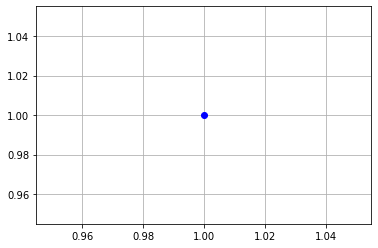

In [ ]:
import matplotlib.pyplot as plt

class ponto:
  def __init__(self,x=1.0,y=1.0,symbol='o',color='blue'):
    self.x = x
    self.y = y
    self.symbol = symbol
    self.color  = color
    self.fig  = plt.figure()
    self.ax   = plt.axes()

  def desenha(self):
    self.ax.plot(self.x,self.y,self.symbol,color=self.color)
    self.ax.grid()
    self.fig.show()


p1 = ponto()
p1.desenha()


## 12.2. Desenhando com poliforfismo: classe círculo

A classe **circulo** herda todos os campos da classe **ponto** e adiciona um novo campo **raio** referente ao raio de um círculo e **ccolor** para indicar a cor do círculo.

O método **construtor** da **classe círculo** usa o construtor da **classe ponto**, bem como usa **valores padrão** para todos os parâmetros. Também inicializa os campos novos específicos da classe.

O método **desenha** da **classe circulo** emprega uma implementação diferente daquela utilizada na **classe ponto**. Observar o código do método **desenha** dessa classe sobrescreve, isto é, redefine as operações definidas na **classe ponto**. A principal modificação é empregar o comando **plt.Circle** no lugar de **plot**. Além disso, para adicionar o desenho do círculo é necessário adicionar o elemento gerado e salvo na variável **draw_circle** nos eixos do campo **self.fig** através do comando **gca().add_artist** (adicionar aos eixo corrente uma figura).

Também é necessário configurar os eixos para que a figura resultante apareça centralizada nos eixos atuais **self.ax**. Isto é feito por meio do comando **self.ax.set()**. 

Seria possível usar em conjunto a implementação da **classe ponto** se o comentário do comando **super().desenha** fosse removido.

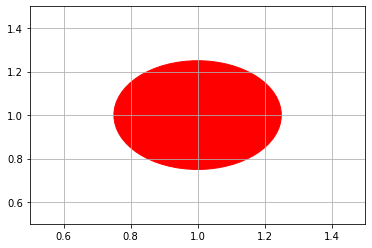

In [ ]:
import matplotlib.pyplot as plt

class circulo(ponto):
  def __init__(self,x=1.0,y=1.0,symbol='o',ccolor='red',raio=0.25):
    super().__init__(x,y,symbol)
    self.raio = raio
    self.ccolor = ccolor
   
  def desenha(self):
    #super().desenha()
    draw_circle = plt.Circle((self.x, self.y), self.raio, fill=True, 
                             color=self.ccolor)
    self.fig.gca().add_artist(draw_circle)
    x = self.x
    y = self.y
    r = self.raio
    xmin = x - 2*r
    xmax = x + 2*r
    ymin = y - 2*r
    ymax = y + 2*r
    self.ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    self.ax.grid()
    self.fig.show()

c1 = circulo()
c1.desenha()

## 12.3 Criando uma lista de objetos geométricos

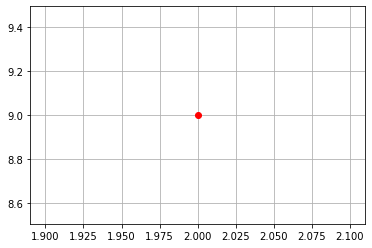

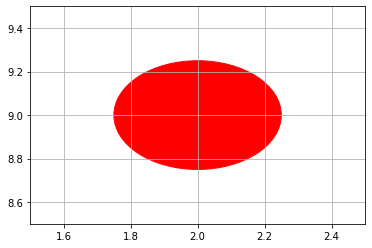

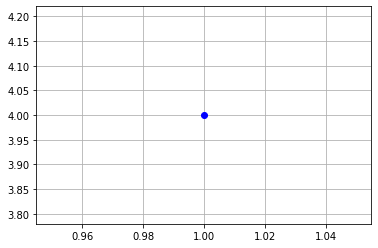

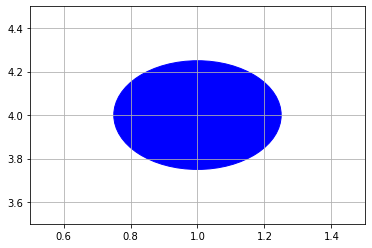

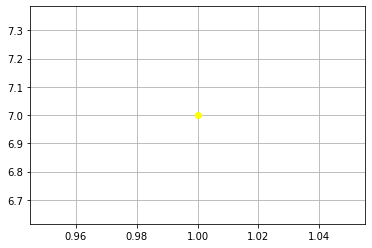

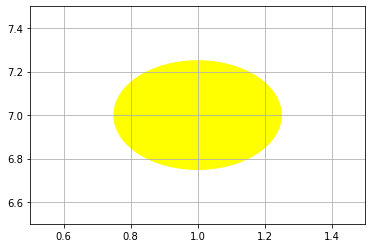

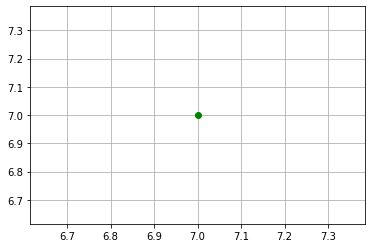

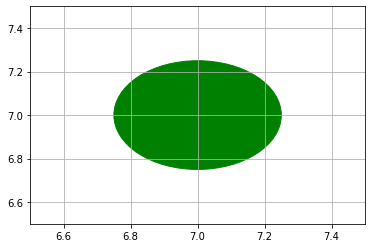

In [ ]:
from random import seed
from random import randint
seed(1)

L = []
cdic = {1:'red',2:'blue',3:'yellow',4:'green'}

for i in range(1,5):
  x = randint(0, 10)
  y = randint(0, 10)
  L.append(ponto(x,y,color=cdic[i]))
  L.append(circulo(x,y,ccolor=cdic[i]))

for g in L:
  g.desenha()

# 13. Classes Abstratas

O **polimorfismo** pode ser obtido ao se definir uma **classe abstrata**, isto é, uma classe tal que existe pelo menos um **método abstrato**. Métodos abstratos são aqueles que são **declarados**, mas **não são definidos**. 

Para declarar um **método abstract** basta utilizar a palavra-chave **@abstractmethod** antes da declaração do método.

Depois que uma classe abstrata é criada, **classes** que **herdam** os **métodos abstratos** da **classe abstrata**, mas que **definem** as **operações** a serem realizadas por esses métodos, são criadas. Essas classes são chamadas de **classes concretas**.


## 13.1 Exemplo de classe abstrata

O código a seguir ilustra como criar uma **classe abstrata ABC** cujo construtor não tem implementação e possui o **método abstrato foo**. 

A **classe B** herda a **classe ABC** e implementa o **método foo**, tornando-se uma classe **concreta**, isto é, uma classe para a qual pode-se criar uma instância da mesma.

A **classe C** herda a **classe B**, bem como define e implementa um novo **método bar** que é específico apenas dessa classe.

> Bloco com recuo



In [ ]:
from abc import ABC, abstractmethod


class A(ABC): # torna a classe A abstrata

    def __init__(self):
        pass # não tem implementação, mas deverá ter no futuro.

    @abstractmethod  # torna o método abstrato.
    def foo(self,s):
        return

class B(A):  # a classe B herda de A e implementa o método foo.
    def __init__(self):
        super(B, self).__init__()
        pass 

    def foo(self):
        print('Foo method in class B')


class C(B):  # a classe C herda de B e implementa novo método bar.
    def bar(self):
        print('Bar method in class C')

class_b = B()
class_b.foo()
class_c = C()
class_c.foo()
class_c.bar()

Foo method in class B
Foo method in class B
Bar method in class C


## 13.2 Classes abstratas e isinstance

A partir do código anterior é possível criar uma **lista de objetos** das **classes B e C** e depois invocar o **método foo** para qualquer objeto. O porém é que para o caso do objeto ser da **classe C** deseja-se também **invocar** um método exclusivo desta classe, o **método bar**.

Para tanto, pode-se empregar a função **isinstance** que verifica se um dado objeto é de uma dada classe (retorna **True**) ou não (retorna **False**). Caso o objeto seja da **classe C**, então, será invocado o **método bar**.



In [ ]:
lista = [] 
lista.append(B())
lista.append(C())

for obj in lista:
  obj.foo()
  if isinstance(obj, C):
    obj.bar()

Foo method in class B
Foo method in class B
Bar method in class C


# 14. Interface

Toda **classe abstrata** que só possua métodos abstratos é denominada de **Interface**. O propósito das **Interfaces** é garantir que certas **classes usem e implementem métodos** que são **comuns entre elas**, mas que **não** o **é possível** fazer isso através do mecanismo de **Herança única**. 

**Iterfaces** são necessárias para linguagens de programação que não permitem herança múltipla, mas no caso do Python é possível empregar esse recurso e, portanto, não existe uma palavra-chave específica para se criar formalmente uma interface.

# 15. Tratamento de exceções

Na linguagem de programação Python para o caso de um erro de uma operação, a linguagem oferece o lançamento de uma mensagem de erro ou exceção.

O código a seguir ilustra esse mecanismo ao se tentar realizar a operação 0/0. Como a operação matemática não pode ser realizada, a linguagem envia uma mensagem para o usuário indicando o erro ocorrido. Esse erro é dito **erro de exceção**.

In [ ]:
print( 0 / 0)

ZeroDivisionError: ignored

É possível definir suas próprias mensagens de erro de exceção através dos comandos **raise** e **Exception**. A palavra **raise** significa levantar e **Exception** significa exceção. A combinação dessas duas palavras-chaves irá fornecer o tipo de mensagem que deverá aparecer para o usuário no console caso alguma condição seja atingida pelo programa. 

In [ ]:
x = -10
if x < 0:
    raise Exception('x não pode ser negativo. O valor atual de x é: {}'.format(x))

Exception: ignored

Ao invés de se utilizar um **if** para verificar o atendimento de uma dada condição, pode-se empregar o comando **assert**. A vantagem em que em caso de erro será possível definir como lidar com o mesmo, como será visto mais a frente.

O código a seguir verifica se a plataforma utilizada pelo Google Colab é linux. Se de fato for, então, nenhuma mensagem de erro irá ocorrer.

In [ ]:
import sys
assert ('linux' in sys.platform)

O código dado a seguir introduz 4 comandos que devem ser aplicados em sequência: **try**, **except**, **else**, e **finally**.

1. **try**: tenta executar um comando. Para o caso do comando levantar alguma exceção será verificado se foi um erro de **assert**. 

2. Para o caso do erro em **assert**, o mesmo será tratado no bloco definido em **except AssertionError as error:**.

3. Caso não ocorra erro, então, o fluxo do programa será direcionado para o **else** do **try**.

4. O comando **finally** é sempre executado não importando quais exceções ocorreram.

In [ ]:
def linux():
    assert ('linux' in sys.platform), "Esta função só funciona em linux."
    
try:
    linux()
except AssertionError as error:
    print(error)
    print('A função linux() não funcionou')
else:
    try:
      print('Tentando operação aritmética...')
      print(0/0)
    except ZeroDivisionError as error:
      print('Erro de divisão por zero!')
finally:
  print("Sempre é executado!")

Tentando operação aritmética...
Erro de divisão por zero!
Sempre é executado!
